### Importing the libraries :

In [222]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time

% matplotlib inline

In [223]:
# importing the dataset

df = pd.read_csv(r"E:\Material\E Learning\Udemy\Cours\udem_MachineLearningPractical_superdatascience\App Behaviour Analysis\appdata10.csv", parse_dates=['first_open'])

In [224]:
# first 5 rows of the dataset

df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [225]:
# return the hour's magnitude :

def extractTimeHour(value):
    return re.findall(r"\d\d", str(value))[0]

df['hour'] = df['hour'].apply(extractTimeHour)

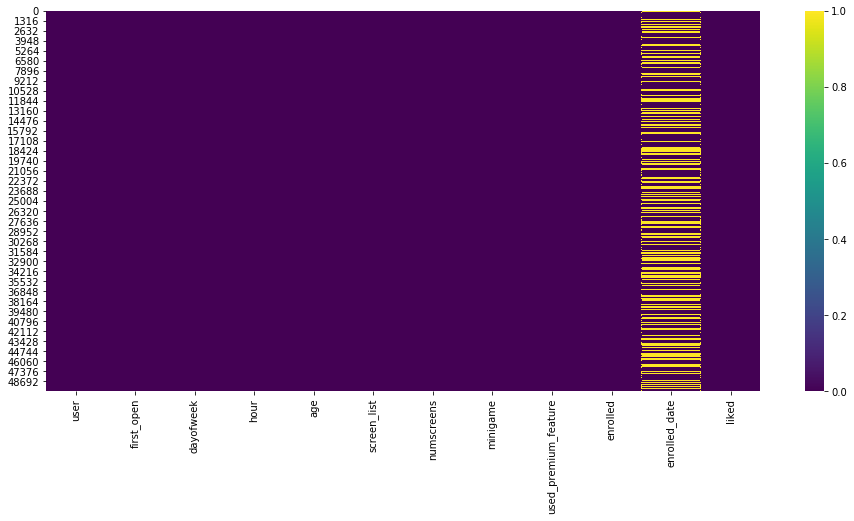

In [226]:
plt.figure(figsize=(16, 7))
sns.heatmap(df.isnull(), cmap='viridis')

In [227]:
# ['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled']

df2 = df.drop(columns=['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'])

In [228]:
df2.head(3)

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,02,23,15,0,0,0
1,6,01,24,13,0,0,0
2,1,19,23,3,0,1,1


### Understanding the correlation between User's Enrollment other features : 

C:\anaconda5\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0,0.5,'magnitude')

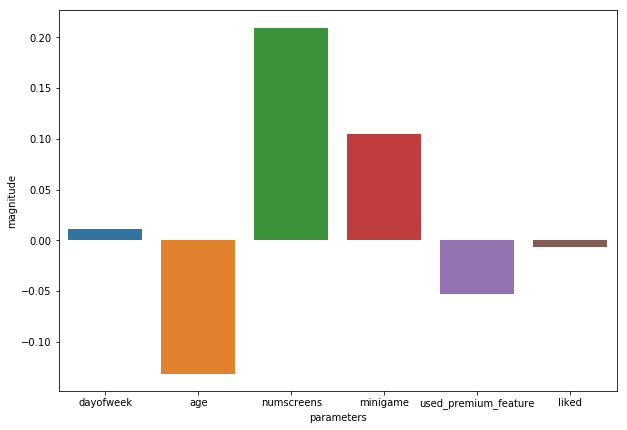

In [229]:
# correlations between features of df2 and df's "enrolled" feature :

plt.figure(figsize=(10,7))
sns.barplot(pd.DataFrame(df2.corrwith(df.enrolled)).reset_index()['index'],
            pd.DataFrame(df2.corrwith(df.enrolled)).reset_index()[0])
plt.xlabel('parameters')
plt.ylabel('magnitude')

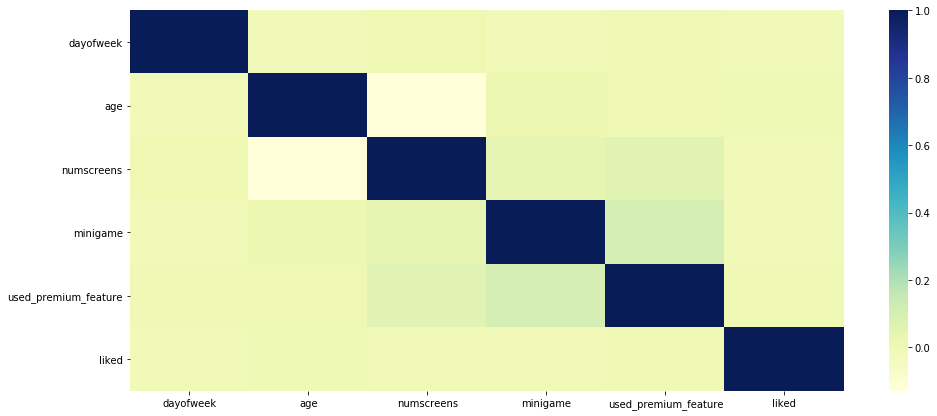

In [230]:
# correlation plot for df2 features :

plt.figure(figsize=(16, 7))
sns.heatmap(df2.corr(), cmap='YlGnBu')

In [231]:
df2.corr()  # correlation factors for features of df2 :

,dayofweek,age,numscreens,minigame,used_premium_feature,liked
dayofweek,1.000000,-0.012326,0.007925,-0.008631,0.001439,-0.005737
age,-0.012326,1.000000,-0.128739,0.019745,0.004301,-0.002593
numscreens,0.007925,-0.128739,1.000000,0.041154,0.061972,-0.007349
minigame,-0.008631,0.019745,0.041154,1.000000,0.108780,-0.012250
used_premium_feature,0.001439,0.004301,0.061972,0.108780,1.000000,0.001690
liked,-0.005737,-0.002593,-0.007349,-0.012250,0.001690,1.000000


In [232]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [233]:
# Feature Engineering :

df['first_open'] = pd.to_datetime(df['first_open'])
df['enrolled_date'] = [ pd.to_datetime(row_date) if isinstance(row_date, str) else row_date for row_date in df['enrolled_date']]

In [234]:
df['difference'] = (df['enrolled_date'] - df['first_open']).astype('timedelta64[h]')

C:\anaconda5\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


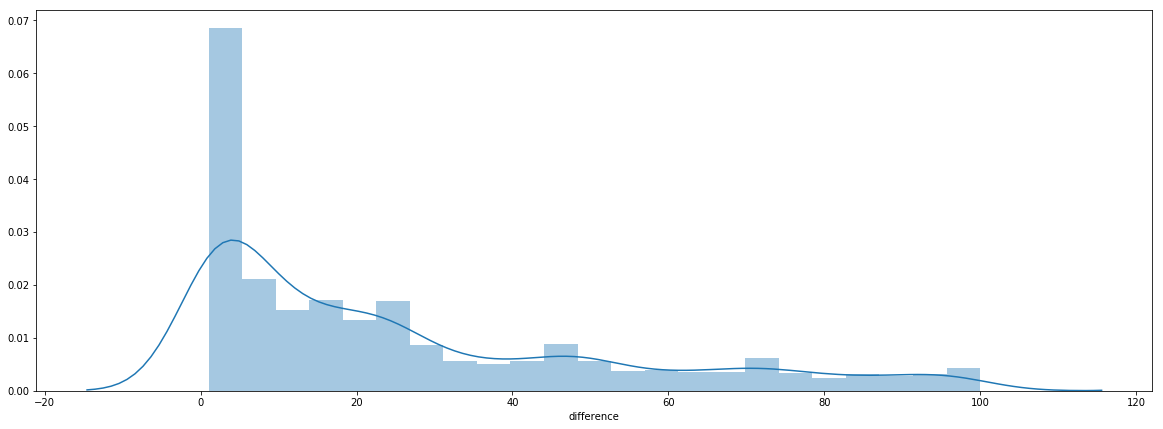

In [235]:
# distribution of hours within which enrollment was done :  
# for first 100 hours only

plt.figure(figsize=(20, 7))    
sns.distplot(df.loc[(df['difference']>=1) & (df['difference']<=100)]['difference'])

### Feature Engineering :

In [236]:
# Limiting the Feature Engineering or Constraining the analysis to only first 2 days(48 hrs) :

df.loc[df['difference'] > 48, 'enrolled'] = 0   # where the enrollment was done after 2 days, then consider enrollment = 0 whatever the case maybe
df = df.drop(columns=['difference', 'enrolled_date', 'first_open'])

In [237]:
df.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,02,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,01,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


In [238]:
# Formatting the top screens :

top_screens = pd.read_csv(r"E:\Material\E Learning\Udemy\Cours\udem_MachineLearningPractical_superdatascience\App Behaviour Analysis\top_screens.csv")
del top_screens['Unnamed: 0']
# top_screens = top_screens.values

In [239]:
top_screens.head()

,top_screens
0,Loan2
1,location
2,Institutions
3,Credit3Container
4,VerifyPhone


In [240]:
df['screen_list'] = df['screen_list'] + ","

for each in top_screens['top_screens']:
    
    df[each] = df['screen_list'].str.contains(each).astype('int')
    df['screen_list'] = df['screen_list'].str.replace(each, '')
    
df['other'] = df['screen_list'].str.count(',')

In [241]:
df.drop(columns=['screen_list'], inplace=True)

In [242]:
df.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other
0,235136,3,02,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,13
1,333588,6,01,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,11
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,3
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,17
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,19


In [243]:
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

### Funneling :

In [244]:
# Funneling :

# 1.) these screen belong to the same category hence those features are common and therefore dropping their individual occurence:

savings_screen = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10']

df['SavingsCount'] = df[savings_screen].sum(axis=1)
df.drop(columns=savings_screen, inplace=True)

In [245]:
# Funneling :

# 2.) these screen belong to the same category hence those features are common and therefore dropping their individual occurence:

cm_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard',
             ]


df['CMCount'] = df[cm_screens].sum(axis=1)
df.drop(columns=cm_screens, inplace=True)

In [246]:
# Funneling :

# 3.) these screen belong to the same category hence those features are common and therefore dropping their individual occurence:

cc_screens = ['CC1',
                  'CC1Category',
                  'CC3'
             ]


df['CCCount'] = df[cc_screens].sum(axis=1)
df.drop(columns=cc_screens, inplace=True)

In [247]:
# Funneling :

# 3.) these screen belong to the same category hence those features are common and therefore dropping their individual occurence:

loan_screens = ['Loan',
                  'Loan2',
                  'Loan3',
                 'Loan4'
             ]


df['LoansCount'] = df[loan_screens].sum(axis=1)
df.drop(columns=loan_screens, inplace=True)

In [248]:
# Data Preprocessing :

response = df['enrolled']

In [249]:
df.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingsCount,CMCount,CCCount,LoansCount
0,235136,3,02,23,15,0,0,0,0,0,...,0,0,0,0,0,13,0,0,0,1
1,333588,6,01,24,13,0,0,0,0,1,...,0,0,0,0,0,11,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,3,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,17,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,19,0,2,0,1


In [250]:
df.drop(columns='enrolled', inplace=True)

In [251]:
# splitting up the dataset :

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, response, test_size=0.20, random_state=0)

train_identifier = X_train['user'] 
test_identifier = X_test['user']

In [253]:
X_train = X_train.drop(columns=['user'])
X_test = X_test.drop(columns=['user'])

In [257]:
X_train = X_train.values
X_test = X_test.values

### Feature Scaling :

In [259]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\anaconda5\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Building a classification model for FinTech :

In [260]:
# Building the classification model 

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0, penalty='l1')
classifier.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [261]:
y_pred = classifier.predict(X_test_scaled)

In [262]:
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [269]:
# Evaluating the model

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.78      0.76      0.77      5072
          1       0.76      0.77      0.77      4928

avg / total       0.77      0.77      0.77     10000



### Cross Validating :

In [274]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier, X=X_train_scaled, y=y_train, cv=10)
print("mean accuracy %0.3f, standard deviation %0.3f" % (accuracies.mean(), accuracies.std() ) )

mean accuracy 0.766, standard deviation 0.004


In [295]:
final_results = pd.DataFrame() # testing predictions dataframe

final_results['user'] = test_identifier 
final_results['predicted_results'] = y_pred
final_results['enrolled'] = y_test

In [298]:
final_results.head()

,user,predicted_results,enrolled
11841,239786,1,1
19602,279644,1,1
45519,98290,0,0
25747,170150,1,1
42642,237568,1,1
